In [ ]:
import pandas as pd

movie_reviews = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
print(f"Review: {movie_reviews.iloc[0]['review']}")
print()
print(f"Sentiment: {movie_reviews.iloc[0]['sentiment']}")

Review: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [ ]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example text
text = "This is an example sentence."

# Tokenize the text
tokens = tokenizer.tokenize(text)
print(tokens)

# Convert tokens to input IDs (integers)
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print(input_ids)

# Decode input IDs back to text and set `clean_up_tokenization_spaces`
decoded_text = tokenizer.decode(input_ids, clean_up_tokenization_spaces=True)  # Set to False if you don't want spaces cleaned
print(decoded_text)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

['this', 'is', 'an', 'example', 'sentence', '.']
[2023, 2003, 2019, 2742, 6251, 1012]
this is an example sentence.


In [ ]:
pip install bert

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3745 sha256=92418fd72a38237f90dfcbc5689fec226d75154db63e54d727cdee3dc5680554
  Stored in directory: /root/.cache/pip/wheels/55/82/8d/a9bad0b8280eb858aa3dcb4e617ee5a1653fdeb239e1e8c3fe
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6780 sha256=c895e64b50ad7801565796c750320b92ea8d08a214df450058ffdaeaee03d047
  Stored in directory: /root/.cache/pip/wheels/63/ea/24/ab8ff86604f1a87ca69a06af89bb7e080a5e064fbf5581423f
Successfully built bert erlastic


In [ ]:
# Regular imports
import numpy as np
import pandas as pd
import tqdm # for progress bar
import math
import random
import re

# Tensorflow Import
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

# Bert Import for Tokenizer
import bert

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"s+[a-zA-Z]s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r's+', ' ', sentence)

    return sentence

# Clean all Reviews in DataFrame
reviews = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

In [ ]:
# Save sentiments as dependent variable y
y = movie_reviews['sentiment']

# Set 1 for positive reviews and 0 for negative reviews
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
pip install tensorflow tensorflow-hub bert-for-tf2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Install necessary libraries
# pip install transformers tensorflow

# Import libraries
from transformers import BertTokenizer, TFBertModel

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize a sample text
text = "don't be so rude"
tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)

# Convert tokens to token IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", token_ids)

# Add special tokens ([CLS] and [SEP]) and convert to IDs
input_ids = tokenizer.encode(text, add_special_tokens=True)
print("Input IDs with Special Tokens:", input_ids)

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

# Convert input IDs to a tensor
import tensorflow as tf
input_ids_tensor = tf.constant([input_ids])  # Batch size = 1

# Pass through BERT model
output = bert_model(input_ids_tensor)

# Get the last hidden state
last_hidden_state = output.last_hidden_state
print("Last Hidden State Shape:", last_hidden_state.shape)


Tokens: ['don', "'", 't', 'be', 'so', 'rude']
Token IDs: [2123, 1005, 1056, 2022, 2061, 12726]
Input IDs with Special Tokens: [101, 2123, 1005, 1056, 2022, 2061, 12726, 102]


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Last Hidden State Shape: (1, 8, 768)


In [ ]:
from transformers import BertTokenizer, TFBertModel

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize some text
text = "don't be so rude"
inputs = tokenizer(text, return_tensors='tf')

# Print the tokenized result
print(inputs)

# Pass inputs to the model
outputs = model(**inputs)
print(outputs)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

{'input_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=
array([[  101,  2123,  1005,  1056,  2022,  2061, 12726,   102]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}
TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 8, 768), dtype=float32, numpy=
array([[[ 0.13477951,  0.12143323, -0.22525896, ...,  0.05812492,
          0.09747527,  0.39716834],
        [ 0.32263774, -0.3415078 , -0.45835888, ...,  0.3675677 ,
          0.04608623,  0.1792549 ],
        [ 0.5097608 ,  0.21820661, -0.28520232, ...,  0.12331448,
         -0.5639726 , -0.29706192],
        ...,
        [-0.7693829 , -1.2527274 , -0.06142392, ...,  0.09675737,
         -0.24582094,  2.1275928 ],
        [-0.08207645, -0.20423011, -0.62103444, ...,  1.0424492 ,
          0.31589866, -0

In [ ]:
# Tokenize all reviews
def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))
tokenized_reviews = [tokenize_reviews(review) for review in reviews]

# Create list of list with review, sentiment, and length of review for each entry
reviews_with_len = [[review, y[i], len(review)]

                     for i, review in tqdm.tqdm(enumerate(tokenized_reviews))]

# Shuffle dataset
random.shuffle(reviews_with_len)

# Sort by length of review
reviews_with_len.sort(key=lambda x: x[2])

# Drop review
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in tqdm.tqdm(reviews_with_len)]

50000it [00:00, 838153.40it/s]
100%|██████████| 50000/50000 [00:00<00:00, 1198461.60it/s]


In [ ]:
# Create Tensorflow datasets
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))

# Define batch size and cut datasets by batch size
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [ ]:
TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

In [ ]:
class TEXT_MODEL(tf.keras.Model):

    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)

        self.embedding = layers.Embedding(vocabulary_size, embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters, kernel_size=2, padding="valid", activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters, kernel_size=3, padding="valid", activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters, kernel_size=4, padding="valid", activation="relu")
        self.pool = layers.GlobalMaxPool1D()

        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)

        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1, activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes, activation="softmax")

    def call(self, inputs, training=False):  # Add default value for training
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l)
        l_1 = self.pool(l_1)
        l_2 = self.cnn_layer2(l)
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3)

        concatenated = tf.concat([l_1, l_2, l_3], axis=-1)  # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training=training)  # Pass training as a keyword argument
        model_output = self.last_dense(concatenated)

        return model_output


In [ ]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 10

# Build Model
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

# Compile Model
text_model.compile(loss="binary_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])


In [ ]:
text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 512s 360ms/step - accuracy: 0.8123 - loss: 0.3905
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 487s 345ms/step - accuracy: 0.9271 - loss: 0.1875
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 502s 345ms/step - accuracy: 0.9623 - loss: 0.1040
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 482s 341ms/step - accuracy: 0.9781 - loss: 0.0609
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 485s 343ms/step - accuracy: 0.9884 - loss: 0.0329
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 479s 339ms/step - accuracy: 0.9939 - loss: 0.0184
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 472s 335ms/step - accuracy: 0.9946 - loss: 0.0160
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 477s 338ms/step - accuracy: 0.9934 - loss: 0.0173
Epoch 9/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 481s 341ms/step - accuracy: 0.9929 - loss: 0.0193
Epoch 10/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 477s 338ms/step - accuracy: 0.9948 - loss: 0.0146


In [ ]:
text_model.evaluate(test_data)

156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.8832 - loss: 0.5641


[0.519658088684082, 0.8912259340286255]

In [ ]:
# Test model on two individual reviews
test_reviews = ['You are not a bad person',
                'One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie']
test_reviews_with_len = [[tokenize_reviews(test_reviews[0]),
                          1,
                          len(tokenize_reviews(test_reviews[0]))],
                         [tokenize_reviews(test_reviews[1]),
                          0,
                          len(tokenize_reviews(test_reviews[1]))]]
test_sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in tqdm.tqdm(test_reviews_with_len)]

predict_input = tf.data.Dataset.from_generator(lambda: test_sorted_reviews_labels, output_types=(tf.int32, tf.int32))
BATCH_SIZE = 2
test_batched_dataset = predict_input.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

# Get model prediction
text_model.predict(test_batched_dataset)

100%|██████████| 2/2 [00:00<00:00, 17476.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.890796e-02],
       [3.771999e-06]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate model on the test dataset
loss, accuracy = text_model.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Alternatively, manually compute accuracy

# Get predictions on the test data
y_true = []
y_pred = []

for batch in test_data:
    inputs, labels = batch
    predictions = text_model.predict(inputs)
    predicted_classes = tf.round(predictions).numpy().flatten()  # Binary classification: round to 0 or 1

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_classes)

# Calculate accuracy manually
test_accuracy = accuracy_score(y_true, y_pred)
print(f"Manual Test Accuracy: {test_accuracy}")


156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8832 - loss: 0.5641
Test Loss: 0.519658088684082
Test Accuracy: 0.8912259340286255
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

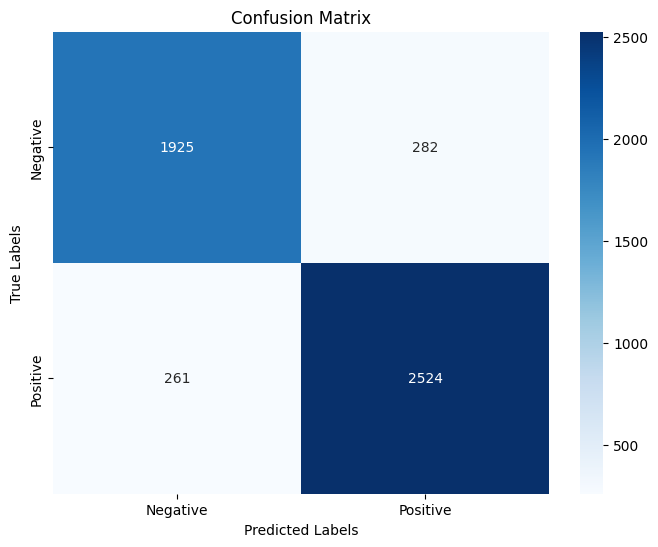

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.87      0.88      2207
    Positive       0.90      0.91      0.90      2785

    accuracy                           0.89      4992
   macro avg       0.89      0.89      0.89      4992
weighted avg       0.89      0.89      0.89      4992



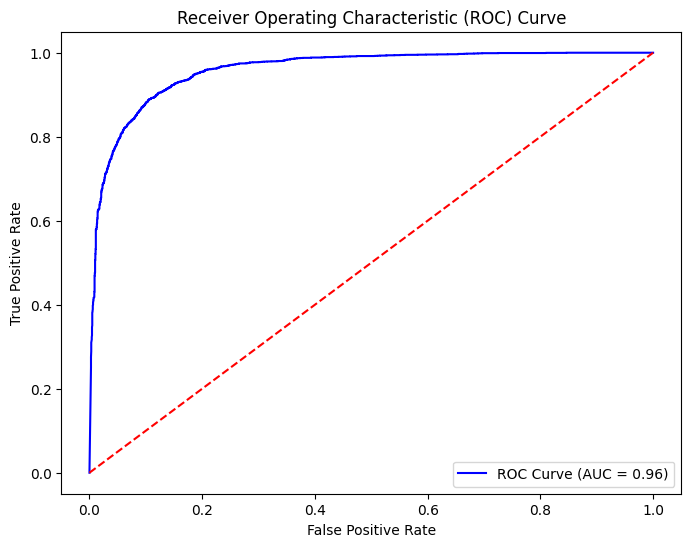

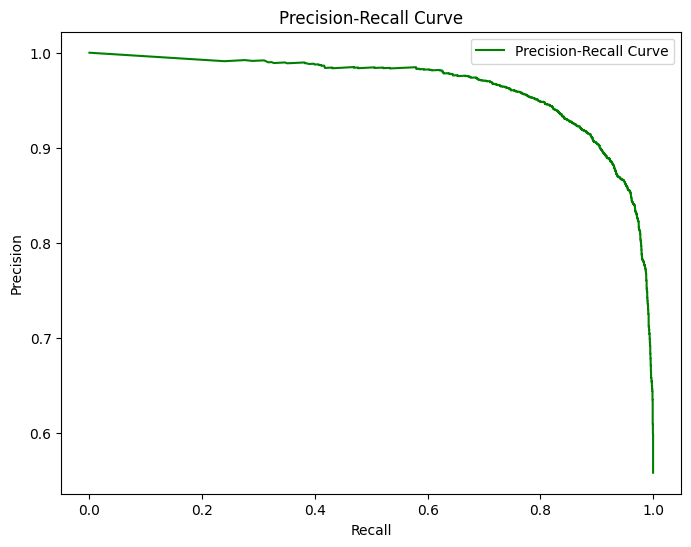

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    accuracy_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Gather true labels and predictions
y_true = []
y_pred = []
y_prob = []

for batch in test_data:
    inputs, labels = batch
    predictions = text_model.predict(inputs)
    predicted_classes = tf.round(predictions).numpy().flatten()  # Round for binary classification
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_classes)
    y_prob.extend(predictions.flatten())  # Probabilities for ROC and Precision-Recall

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

# ROC Curve and AUC
fpr, tpr, thresholds_roc = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import register_keras_serializable

# Define the custom model and register it
@register_keras_serializable()  # Ensures compatibility with Keras model saving/loading
class TEXT_MODEL(tf.keras.Model):
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 name="text_model",
                 **kwargs):
        super(TEXT_MODEL, self).__init__(name=name, **kwargs)
        self.vocabulary_size = vocabulary_size
        self.embedding_dimensions = embedding_dimensions
        self.cnn_filters = cnn_filters
        self.dnn_units = dnn_units
        self.model_output_classes = model_output_classes
        self.dropout_rate = dropout_rate

        self.embedding = tf.keras.layers.Embedding(vocabulary_size, embedding_dimensions)
        self.cnn_layer1 = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=2, activation="relu")
        self.cnn_layer2 = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=3, activation="relu")
        self.cnn_layer3 = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=4, activation="relu")
        self.pool = tf.keras.layers.GlobalMaxPooling1D()
        self.dense_1 = tf.keras.layers.Dense(units=dnn_units, activation="relu")
        self.dropout = tf.keras.layers.Dropout(rate=dropout_rate)
        self.last_dense = tf.keras.layers.Dense(
            units=1 if model_output_classes == 2 else model_output_classes,
            activation="sigmoid" if model_output_classes == 2 else "softmax"
        )

    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x1 = self.pool(self.cnn_layer1(x))
        x2 = self.pool(self.cnn_layer2(x))
        x3 = self.pool(self.cnn_layer3(x))
        x = tf.concat([x1, x2, x3], axis=-1)
        x = self.dense_1(x)
        x = self.dropout(x, training=training)
        return self.last_dense(x)

    def get_config(self):
        config = super(TEXT_MODEL, self).get_config()
        config.update({
            "vocabulary_size": self.vocabulary_size,
            "embedding_dimensions": self.embedding_dimensions,
            "cnn_filters": self.cnn_filters,
            "dnn_units": self.dnn_units,
            "model_output_classes": self.model_output_classes,
            "dropout_rate": self.dropout_rate,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


# Example model parameters
VOCAB_LENGTH = 5000
EMB_DIM = 128
CNN_FILTERS = 64
DNN_UNITS = 128
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2

# Initialize and compile the model
text_model = TEXT_MODEL(
    vocabulary_size=VOCAB_LENGTH,
    embedding_dimensions=EMB_DIM,
    cnn_filters=CNN_FILTERS,
    dnn_units=DNN_UNITS,
    model_output_classes=OUTPUT_CLASSES,
    dropout_rate=DROPOUT_RATE
)
text_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Specify the save path
model_save_path = "/content/drive/MyDrive/sentiment_model.keras"

# Save the model
text_model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

# Load the model
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully!")

def predict_sentiment(input_text):
    # Tokenize the input text
    tokenized_text = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(input_text))

    # Handle out-of-vocabulary tokens
    tokenized_text = [tid if tid < loaded_model.vocabulary_size else 0 for tid in tokenized_text]  # Replace OOV tokens with 0 (or another special token)

    tokenized_text = tf.constant([tokenized_text])  # Add batch dimension
    tokenized_text = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_text, maxlen=128, padding='post', truncating='post'
    )
    sentiment_score = loaded_model.predict(tokenized_text)[0][0]
    sentiment = "Positive" if sentiment_score >= 0.5 else "Negative"
    return {"Sentiment": sentiment, "Score": sentiment_score}


# Test with example input
test_input = "The movie was fantastic and I loved it."
result = predict_sentiment(test_input)
print(f"Test Input: {test_input}")
print(f"Prediction: {result}")


Model saved at: /content/drive/MyDrive/sentiment_model.keras
Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Test Input: The movie was fantastic and I loved it.
Prediction: {'Sentiment': 'Positive', 'Score': 0.506695}


In [ ]:
pip install gradio


In [ ]:
import tensorflow as tf
import gradio as gr
from transformers import AutoTokenizer
from tensorflow.keras.utils import register_keras_serializable

# Define the custom model and register it
@register_keras_serializable()
class TEXT_MODEL(tf.keras.Model):
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=64,
                 dnn_units=128,
                 model_output_classes=2,
                 dropout_rate=0.2,
                 name="text_model",
                 **kwargs):  # Add **kwargs to accept additional arguments like 'trainable'
        super(TEXT_MODEL, self).__init__(name=name, **kwargs)  # Pass kwargs to the parent class
        self.embedding = tf.keras.layers.Embedding(vocabulary_size, embedding_dimensions)
        self.cnn_layer1 = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=2, activation="relu")
        self.cnn_layer2 = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=3, activation="relu")
        self.cnn_layer3 = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=4, activation="relu")
        self.pool = tf.keras.layers.GlobalMaxPooling1D()
        self.dense_1 = tf.keras.layers.Dense(units=dnn_units, activation="relu")
        self.dropout = tf.keras.layers.Dropout(rate=dropout_rate)
        self.last_dense = tf.keras.layers.Dense(
            units=1 if model_output_classes == 2 else model_output_classes,
            activation="sigmoid" if model_output_classes == 2 else "softmax"
        )

    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x1 = self.pool(self.cnn_layer1(x))
        x2 = self.pool(self.cnn_layer2(x))
        x3 = self.pool(self.cnn_layer3(x))
        x = tf.concat([x1, x2, x3], axis=-1)
        x = self.dense_1(x)
        x = self.dropout(x, training=training)
        return self.last_dense(x)

    def get_config(self):
        config = super(TEXT_MODEL, self).get_config()
        config.update({
            "vocabulary_size": self.embedding.input_dim,
            "embedding_dimensions": self.embedding.output_dim,
            "cnn_filters": self.cnn_layer1.filters,
            "dnn_units": self.dense_1.units,
            "model_output_classes": self.last_dense.units,
            "dropout_rate": self.dropout.rate,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Load the saved model
model_save_path = "/content/drive/MyDrive/sentiment_model.keras"
loaded_model = tf.keras.models.load_model(model_save_path)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define a prediction function
def predict_sentiment(input_text):
    # Tokenize the input text
    tokenized_text = tokenizer.encode(input_text, add_special_tokens=True, truncation=True, max_length=128)
    tokenized_text = tf.constant([tokenized_text])  # Add batch dimension
    tokenized_text = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_text, maxlen=128, padding='post', truncating='post'
    )

    # Predict sentiment
    sentiment_score = loaded_model.predict(tokenized_text)[0][0]
    sentiment = "Positive" if sentiment_score >= 0.5 else "Negative"
    return f"Sentiment: {sentiment}\nScore: {sentiment_score:.2f}"

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter a sentence to analyze sentiment..."),
    outputs="text",
    title="Sentiment Analysis",
    description="Input a sentence, and the model will predict its sentiment and provide the sentiment score."
)

# Launch the interface
interface.launch()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6fb4c2c649ef68a1cf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
